[View in Colaboratory](https://colab.research.google.com/github/avault/chicago_public_schools/blob/master/analysis_setup.ipynb)

# Setup

In [1]:
# Module Imports

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Make sure we can see all the data
pd.set_option('display.max_rows', None)  

In [3]:
# Load Data
profile_df = pd.read_csv( '../data/Chicago_Public_Schools_-_School_Profile_Information_SY1617.csv' )
progress_df = pd.read_csv( '../data/Chicago_Public_Schools_-_School_Progress_Reports_SY1617.csv' )

In [4]:
profile_df.set_index( 'School_ID', inplace=True )
progress_df.set_index( 'School_ID', inplace=True )

In [5]:
print( '{} school profiles'.format( len( profile_df ) ) )
print( '{} school progress reports'.format( len( progress_df ) ) )

661 school profiles
661 school progress reports


In [6]:
# Combine into one df
combined_df = pd.concat( [profile_df, progress_df ], axis=1 )

In [7]:
# Choose high schools
is_hs = profile_df['Is_High_School'] == 'Y'
hs_df = combined_df.loc[is_hs]

In [8]:
# Allow plotting all columns, and then show them.
for column in hs_df.columns:
    print( column )

Legacy_Unit_ID
Finance_ID
Short_Name
Long_Name
School_Type
Primary_Category
Is_High_School
Is_Middle_School
Is_Elementary_School
Is_Pre_School
Summary
Administrator_Title
Administrator
Secondary_Contact_Title
Secondary_Contact
Address
City
State
Zip
Phone
Fax
CPS_School_Profile
Website
Facebook
Twitter
Youtube
Pinterest
Attendance_Boundaries
Grades_Offered_All
Grades_Offered
Student_Count_Total
Student_Count_Low_Income
Student_Count_Special_Ed
Student_Count_English_Learners
Student_Count_Black
Student_Count_Hispanic
Student_Count_White
Student_Count_Asian
Student_Count_Native_American
Student_Count_Other_Ethnicity
Student_Count_Asian_Pacific_Islander
Student_Count_Multi
Student_Count_Hawaiian_Pacific_Islander
Student_Count_Ethnicity_Not_Available
Statistics_Description
Demographic_Description
ADA_Accessible
Dress_Code
PreK_School_Day
Kindergarten_School_Day
School_Hours
Freshman_Start_End_Time
After_School_Hours
Earliest_Drop_Off_Time
Classroom_Languages
Bilingual_Services
Refugee_Serv

### Some Plotting Functions

In [9]:
def histogram_plot( df, column ):

    fig = plt.figure( figsize=(12,8), facecolor='white' )
    ax = plt.gca()

    ax.hist(
      np.ma.fix_invalid( df[column] ).compressed()
    )

    ax.set_xlabel( column, fontsize=22 )

    plt.xticks( fontsize=20 )

In [10]:
def scatter_plot( df, x_key, y_key ):
  
    fig = plt.figure( figsize=(12,11), facecolor='white' )
    ax = plt.gca()

    ax.scatter(
      df[x_key],
      df[y_key]
    )

    ax.set_xlabel( x_key, fontsize=22 )
    ax.set_ylabel( y_key, fontsize=22 )

    plt.xticks( fontsize=20 )
    plt.yticks( fontsize=20 )

# Analysis

## The Largest High School

In [11]:
largest_school = hs_df.loc[hs_df['Student_Count_Total'].idxmax()]
largest_school

Legacy_Unit_ID                                                                              1440
Finance_ID                                                                                 46221
Short_Name                                                                          LANE TECH HS
Long_Name                                                    Albert G Lane Technical High School
School_Type                                                                 Selective enrollment
Primary_Category                                                                              HS
Is_High_School                                                                                 Y
Is_Middle_School                                                                               Y
Is_Elementary_School                                                                           N
Is_Pre_School                                                                                  N
Summary                       

Lane Tech is the largest school in the CPS system, and receives high marks.

## How Does School Size Correlate with Performance?

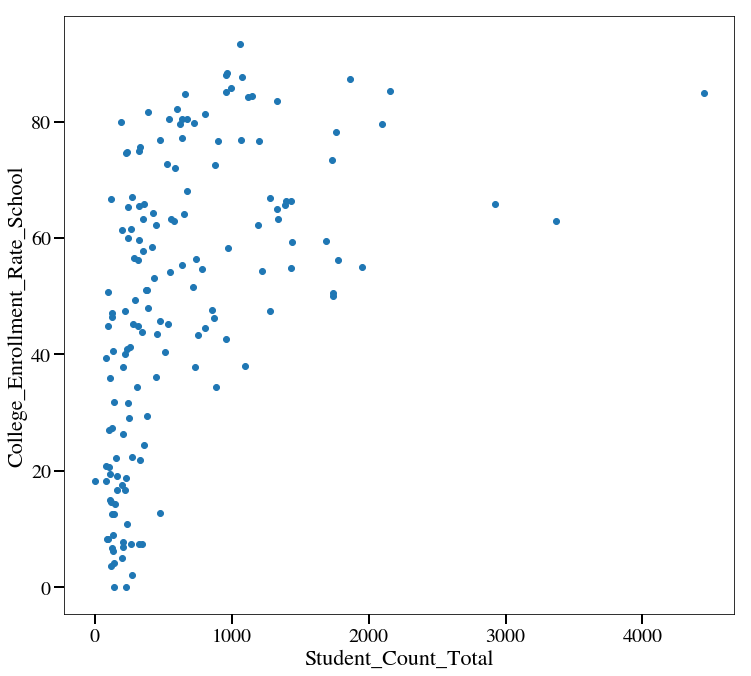

In [12]:
scatter_plot( hs_df, 'Student_Count_Total', 'College_Enrollment_Rate_School' )

## How Does the Fraction of Low Income Students Correlate with Performance?

(0, 100)

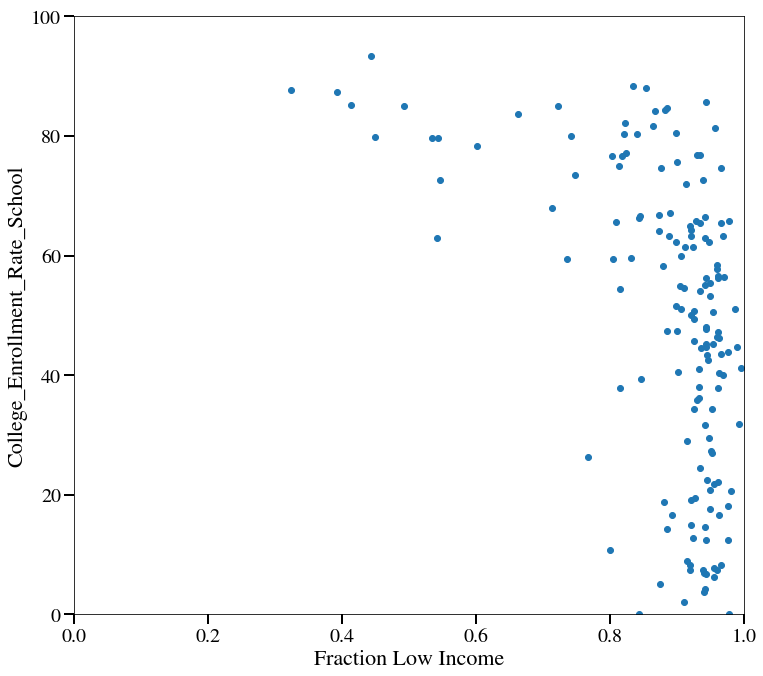

In [27]:
fig = plt.figure( figsize=(12,11), facecolor='white' )
ax = plt.gca()

ax.scatter(
  hs_df['Student_Count_Low_Income'] / hs_df['Student_Count_Total'],
  hs_df['College_Enrollment_Rate_School']
)

ax.set_xlabel( 'Fraction Low Income', fontsize=22 )
ax.set_ylabel( 'College_Enrollment_Rate_School', fontsize=22 )

plt.xticks( fontsize=20 )
plt.yticks( fontsize=20 )

ax.set_xlim(0, 1)
ax.set_ylim(0, 100)

The schools with low college enrollment are **exclusively** schools where more than 70% of students come from a low-income family.

(array([ 0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1]),
 <a list of 10 Text yticklabel objects>)

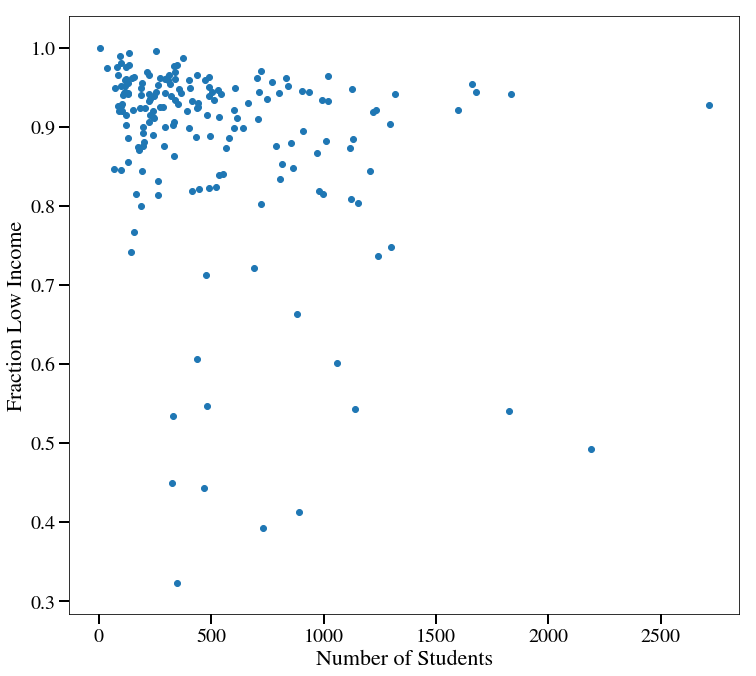

In [30]:
fig = plt.figure( figsize=(12,11), facecolor='white' )
ax = plt.gca()

ax.scatter(
  hs_df['Student_Count_Low_Income'],
  hs_df['Student_Count_Low_Income'] / hs_df['Student_Count_Total'],
)

ax.set_xlabel( 'Number of Students', fontsize=22 )
ax.set_ylabel( 'Fraction Low Income', fontsize=22 )

plt.xticks( fontsize=20 )
plt.yticks( fontsize=20 )

The schools with the highest fraction of low-income students are also those with the fewest students.

## How Does CPS Rating Track Other Performance Metrics?

In [15]:
overall_rating_mapping = {
    'Inability to Rate': 0,
    'Level 3': 1.,
    'Level 3+': 1.5,
    'Level 2': 2.,
    'Level 2+': 2.5,
    'Level 1': 3.,
    'Level 1+': 3.5,
}
overall_rating_int = []
for rating in hs_df['Overall_Rating']:
    overall_rating_int.append( overall_rating_mapping[rating] )
hs_df['Overall_Rating_Int'] = np.array( overall_rating_int )

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


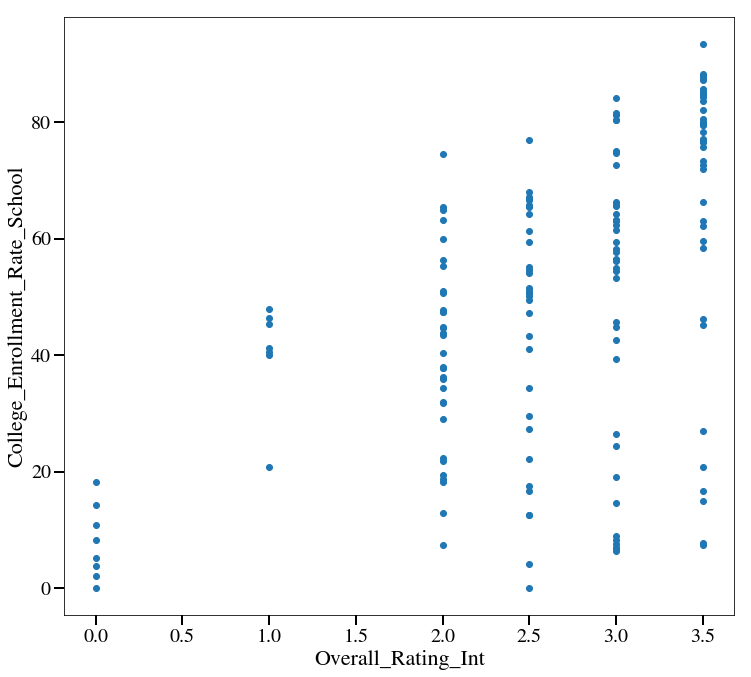

In [16]:
scatter_plot( hs_df, 'Overall_Rating_Int', 'College_Enrollment_Rate_School' )

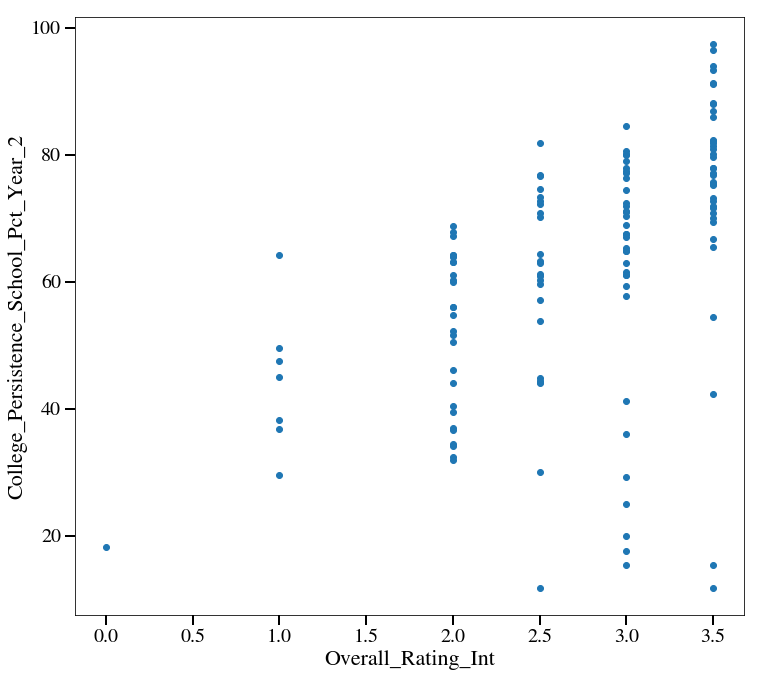

In [21]:
scatter_plot( hs_df, 'Overall_Rating_Int', 'College_Persistence_School_Pct_Year_2' )

### Why are there schools that get a very good rating, but don't enroll many students in college?

In [17]:
# Select these schools
high_rating = hs_df['Overall_Rating_Int'] >= 3.0
low_enrollment = hs_df['College_Enrollment_Rate_School'] <= 30.
high_rating_and_low_enrollment = high_rating & low_enrollment
hr_le_df = hs_df.loc[high_rating_and_low_enrollment]
hr_le_df

,Legacy_Unit_ID,Finance_ID,Short_Name,Long_Name,School_Type,Primary_Category,Is_High_School,Is_Middle_School,Is_Elementary_School,Is_Pre_School,...,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,School_Latitude,School_Longitude,Location,Overall_Rating_Int
School_ID,,,,,,,,,,,,,,,,,,,,,
400123,9040,66106,YCCS - SCHOLASTIC ACHIEVEMENT,YCCS- Academy of Scholastic Achievement HS,Charter,HS,Y,N,N,N,...,NaN,A School Progress Report customized for CPS Op...,This school is “Organized for Improvement” whi...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.880447,-87.742539,"4651 W MADISON ST\nChicago, Illinois 60644\n(4...",3.0
400126,9043,66109,YCCS - ASSOCIATION HOUSE,YCCS-Association House HS,Charter,HS,Y,N,N,N,...,NaN,A School Progress Report customized for CPS Op...,This school is “Partially Organized for Improv...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.901572,-87.706860,"1116 N KEDZIE, 4TH FLOOR AVE\nChicago, Illinoi...",3.0
400127,9044,66611,YCCS - AUSTIN CAREER,YCCS-Austin Career Education Center HS,Charter,HS,Y,N,N,N,...,NaN,A School Progress Report customized for CPS Op...,This school is “Organized for Improvement” whi...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.894976,-87.760221,"5352 W CHICAGO AVE\nChicago, Illinois 60651\n(...",3.5
400128,9045,66612,YCCS - CCA ACADEMY,YCCS-CCA Academy HS,Charter,HS,Y,N,N,N,...,NaN,A School Progress Report customized for CPS Op...,This school is “Moderately Organized for Impro...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.864943,-87.723662,"1231 S PULASKI RD\nChicago, Illinois 60623\n(4...",3.0
400130,9047,66614,YCCS - YOUTH DEVELOPMENT,YCCS-Community Youth Development Institute HS,Charter,HS,Y,N,N,N,...,NaN,A School Progress Report customized for CPS Op...,This school is “Organized for Improvement” whi...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.751377,-87.641731,"7836 S UNION AVE\nChicago, Illinois 60620\n(41...",3.0
400131,9601,66615,YCCS - CAMPOS,YCCS-Dr. Pedro Albizu Campos Puerto Rican HS,Charter,HS,Y,N,N,N,...,NaN,A School Progress Report customized for CPS Op...,This school is “Organized for Improvement” whi...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.902850,-87.696006,"2739 W DIVISION ST\nChicago, Illinois 60622\n(...",3.0
400133,9602,66617,YCCS - INNOVATIONS,YCCS- Innovations HS of Arts Integration,Charter,HS,Y,N,N,N,...,NaN,A School Progress Report customized for CPS Op...,This school is “Organized for Improvement” whi...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.883047,-87.627734,"17 N STATE ST\nChicago, Illinois 60602\n(41.88...",3.0
400134,9051,66618,YCCS - ADDAMS,YCCS-Jane Addams Alternative HS,Charter,HS,Y,N,N,N,...,NaN,A School Progress Report customized for CPS Op...,This school is “Well-Organized for Improvement...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.857208,-87.644888,"1814 S UNION AVE\nChicago, Illinois 60616\n(41...",3.5
400135,9052,66619,YCCS - LATINO YOUTH,YCCS-Latino Youth Alternative HS,Charter,HS,Y,N,N,N,...,NaN,A School Progress Report customized for CPS Op...,This school is “Moderately Organized for Impro...,Coming Soon,This school is in the process of being reviewe...,2016.0,41.854665,-87.695430,"2001 S CALIFORNIA AVE\nChicago, Illinois 60608...",3.0


(0, 100)

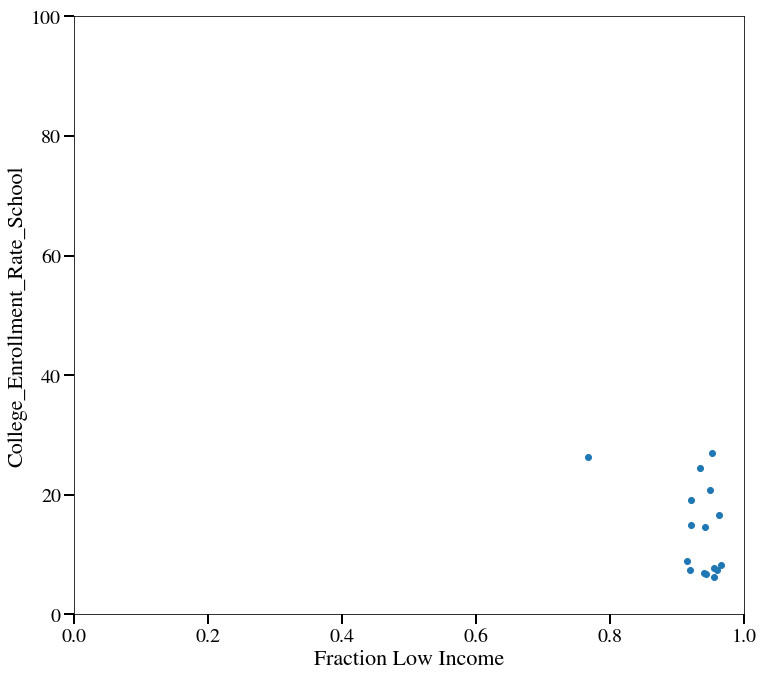

In [24]:
fig = plt.figure( figsize=(12,11), facecolor='white' )
ax = plt.gca()

ax.scatter(
  hr_le_df['Student_Count_Low_Income'] / hr_le_df['Student_Count_Total'],
  hr_le_df['College_Enrollment_Rate_School']
)

ax.set_xlabel( 'Fraction Low Income', fontsize=22 )
ax.set_ylabel( 'College_Enrollment_Rate_School', fontsize=22 )

plt.xticks( fontsize=20 )
plt.yticks( fontsize=20 )

ax.set_xlim(0, 1)
ax.set_ylim(0, 100)

(array([   0.,   20.,   40.,   60.,   80.,  100.]),
 <a list of 6 Text xticklabel objects>)

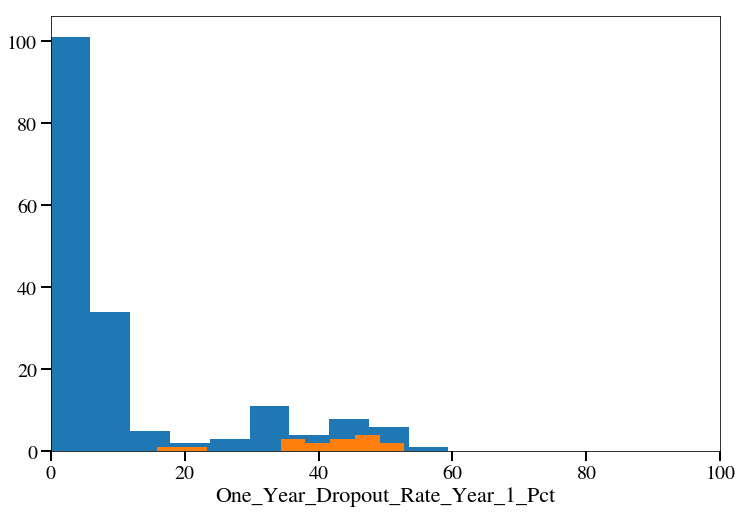

In [60]:
fig = plt.figure( figsize=(12,8), facecolor='white' )
ax = plt.gca()

column = 'Student_Attendance_Year_2_Pct'

ax.hist(
  np.ma.fix_invalid( hs_df[column] ).compressed()
)
ax.hist(
  np.ma.fix_invalid( hr_le_df[column] ).compressed()
)

ax.set_xlabel( column, fontsize=22 )

ax.set_xlim( 0, 100 )

plt.xticks( fontsize=20 )

It doesn't seem to be student attendance... Unless we need to compare to similar schools.

The answer must lie in digging into how the ratings are calculated. CPS has that online [here](http://cps.edu/sqrp).

# How Does Attendance Correlate?

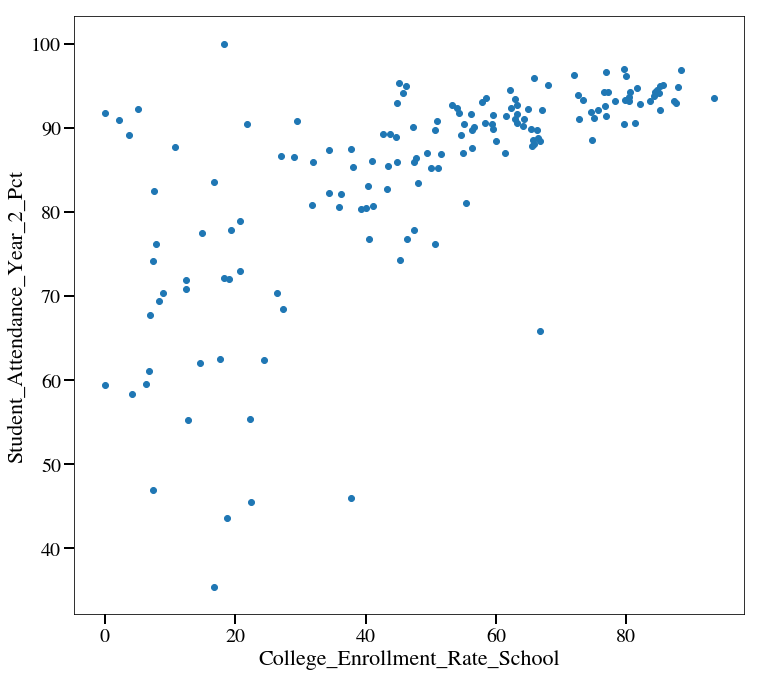

In [58]:
scatter_plot( hs_df, 'College_Enrollment_Rate_School', 'Student_Attendance_Year_2_Pct',  )